<a href="https://colab.research.google.com/github/nksrivastavaa/ML-workshop/blob/main/ML_Classification_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

Some Sources - [Research Gate](https://www.researchgate.net/figure/Flowchart-of-logistic-regression_fig4_352975798), [Jovian](https://jovian.com/learn/machine-learning-with-python-zero-to-gbms/lesson/logistic-regression-for-classification), [Deep Netts](https://www.deepnetts.com/blog/from-basic-machine-learning-to-deep-learning-in-5-minutes.html), [ScienceDirect](https://www.sciencedirect.com/topics/engineering/confusion-matrix)

###Technical Coordinator - Neelabh Kumar Srivastava
####Email - neelabh20317@iiitd.ac.in

I am a Junior at IIIT-Delhi majoring in Computer Science and Applied Mathematics

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
od.version()

'0.1.22'



###To download the dataset from kaggle, follow the steps given below:
1. Google sign-in on kaggle with your account.
2. Click here!
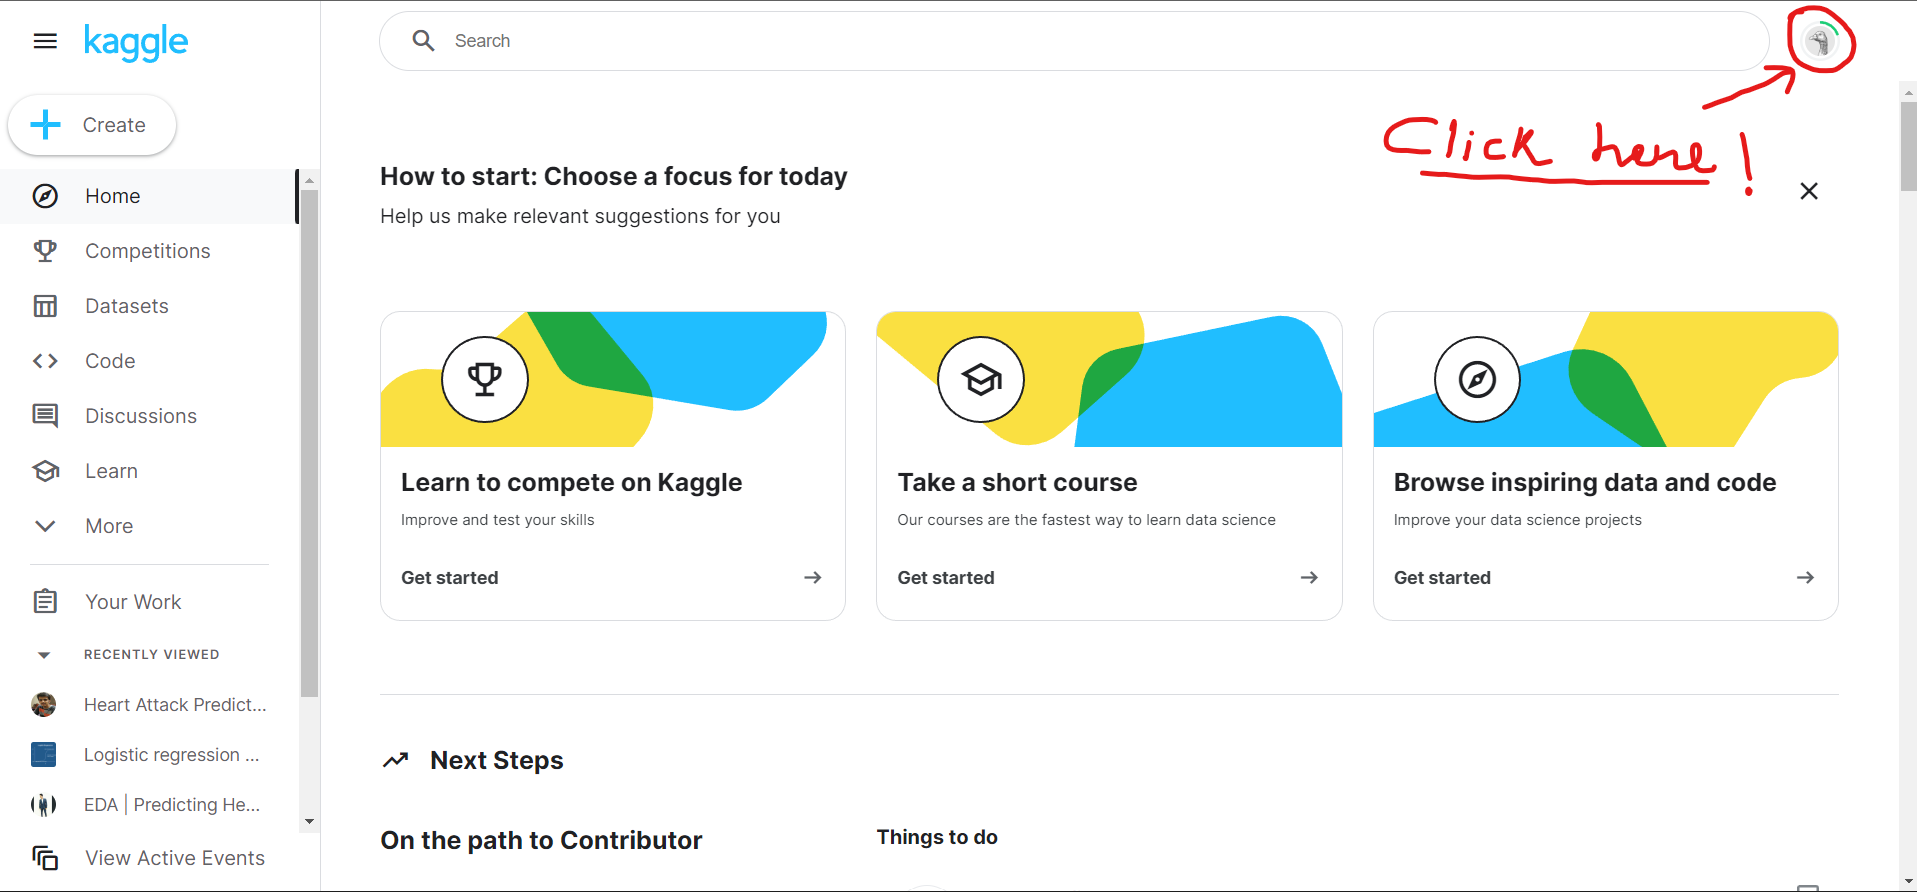    
3. Go to account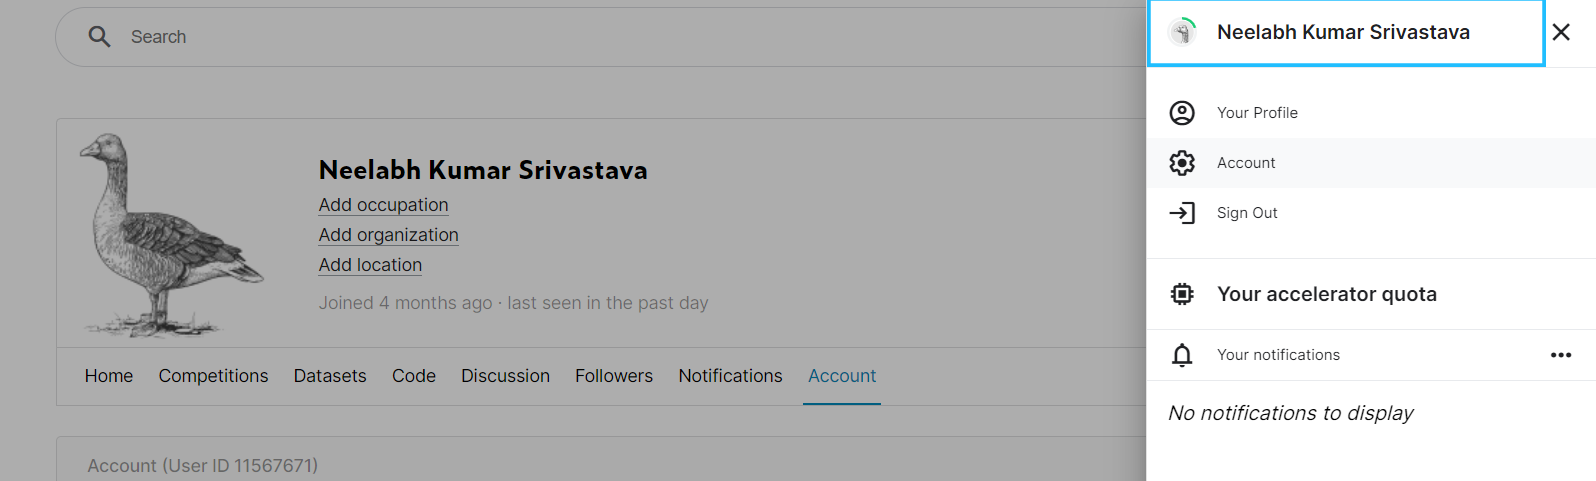
4. Scroll down and press on "Create New API Token"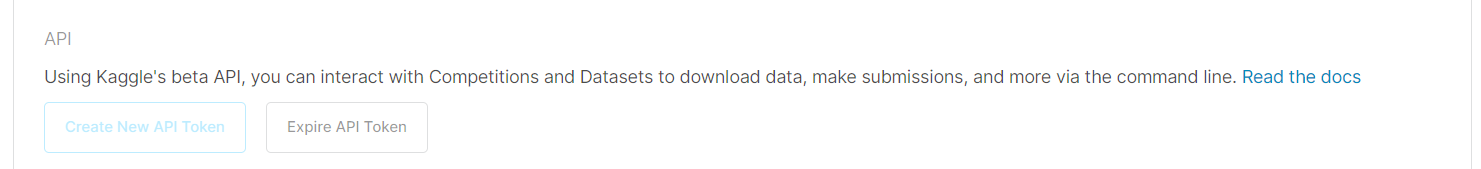
5. This will download a `kaggle.json` file which will contain your `username` and `key` which you can use to download datasets.

In [ ]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nksrivastava
Your Kaggle Key: ··········


100%|██████████| 3.83M/3.83M [00:00<00:00, 208MB/s]

In [ ]:
import os
data_dir = './weather-dataset-rattle-package'
os.listdir(data_dir)

['weatherAUS.csv']

In [ ]:
train_csv = data_dir + "/weatherAUS.csv"

In [ ]:
import pandas as pd
raw_df = pd.read_csv(train_csv)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

###An alternate (easier) way to import the dataset


In [ ]:
import pandas as pd

!wget https://raw.githubusercontent.com/nksrivastavaa/ML-workshop-dataset/main/weatherAUS.csv

raw_df = pd.read_csv('weatherAUS.csv')
raw_df.info()

--2023-01-24 14:46:03--  https://raw.githubusercontent.com/nksrivastavaa/ML-workshop-dataset/main/weatherAUS.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14094055 (13M) [text/plain]
Saving to: ‘weatherAUS.csv.1’

weatherAUS.csv.1    100%[===================>]  13.44M  --.-KB/s    in 0.08s   

2023-01-24 14:46:03 (166 MB/s) - ‘weatherAUS.csv.1’ saved [14094055/14094055]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Ra

###By the info on dataset above, we can see that there are some columns that contain null values for some data. There exist several techniques to handle this problem. These are called `DATA IMPUTATION` techniques.

While we should be able to fill in missing values for most columns, it might be a good idea to discard the rows where the value of `RainTomorrow` or `RainToday` is missing to make our analysis and modeling simpler (since one of them is the target variable, and the other is likely to be very closely related to the target variable). 

In [ ]:
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

###Let's import some libraries for `EDA` (Exploratory Data Analysis)
1. Performing EDA is one of the most crucial tasks before diving into selection of the Machine Learning model.
2. This is because EDA helps us understand the data better.
3. It also gives us an idea of how related the parameters (or columns) are.
4. Finally, it also gives us an idea of the separability of data.

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Class Distribution
(To check if data is skewed or not in terms of no. of `Yes`'s and `No`'s in `RainToday`)

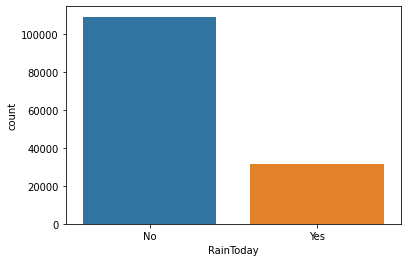

In [ ]:
sns.countplot(x = raw_df["RainToday"])
plt.show()

We can see that the dataset is skewed as the no. of days when `RainToday` is `No` is almost 4 times the no. of days when it is `Yes`.

Still, this type of skewness makes sense since this dataset contains about 10 years of daily weather observations from many locations across Australia. This makes sense since Australia observes the least rainfall among all the other continents.

##1) Rainfall across different locations

In [ ]:
px.histogram(raw_df, x='Location', title='Location vs. Rainy Days', color='RainToday')

##2) Rainfall across different locations (but this gives an idea if there will be rainfall tomorrow as well)

In [ ]:
px.histogram(raw_df, x='Location', title='Location vs. Rainy Days (Will there be rain tomorrow?)', color='RainToday', pattern_shape="RainTomorrow")

This graph gives us a lot of insight. We can notice that if it is raining today, there is a higher probability that it will rain tomorrow. While if it isn't raining today, there is less probability that it will rain tomorrow.

##3) Clouds at 3pm Vs Rainy day tomorrow

In [ ]:
px.histogram(raw_df, x='Cloud3pm', title='Clouds at 3pm Vs Rainy day tomorrow', color='RainTomorrow')

We can see when there are more clouds at 3pm, it is more likely to rain the following day.

##4) Temperature at 3 pm vs. Rain Tomorrow

In [ ]:
px.histogram(raw_df, x='Temp3pm', title='Temperature at 3 pm vs. Rain Tomorrow', color='RainTomorrow')

##5) Scatterplot for Rainy days across Min Temp and Max Temp

In [ ]:
px.scatter(raw_df.sample(2023), title='Min Temp. vs Max Temp.', x='MinTemp', y='MaxTemp', color='RainToday')

You can plot the same stuff using seaborn too instead of plotly. For example, the scatterplot above can be made using seaborn as follows:

[Text(0.5, 1.0, 'Min Temp. vs Max Temp.')]

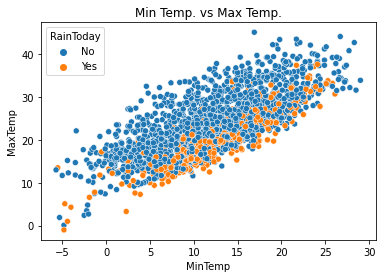

In [ ]:
sns.scatterplot(data=raw_df.sample(2023), x="MinTemp", y="MaxTemp", hue="RainToday").set(title='Min Temp. vs Max Temp.')

##6) No. of rows per year

[Text(0.5, 1.0, 'No. of Rows per Year')]

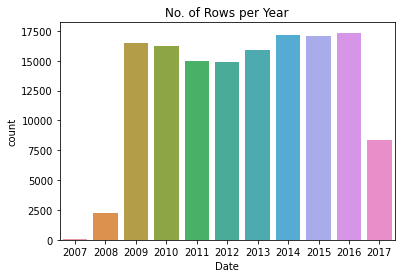

In [ ]:
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year).set(title='No. of Rows per Year')

##Correlation Heatmap

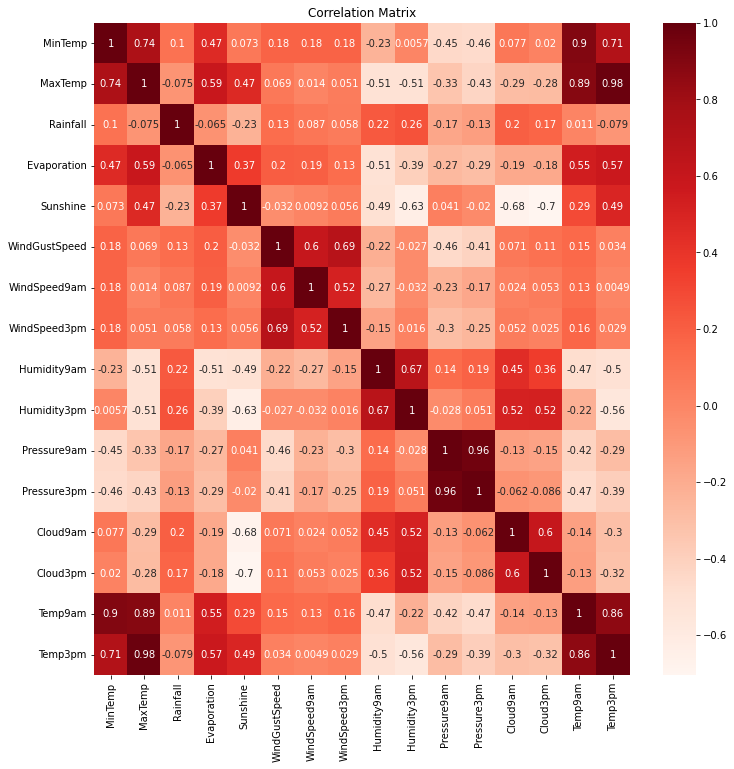

In [ ]:
plt.figure(figsize = (12,12))
sns.heatmap(raw_df.corr(), cmap='Reds', annot=True).set(title='Correlation Matrix');

##Let us come to the cool stuff now! (Read `Scikit-Learn`)

First, we split the data into training, validation and testing sets. This can be done easily using sklearn's inbuilt train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (84471, 23)
val_df.shape : (28158, 23)
test_df.shape : (28158, 23)


In [ ]:
input_cols = list(train_df.columns)[1:-1] # dropping date from input columns since it doesn't seem to be relevant in prediction of rain tomorrow.
target_col = 'RainTomorrow' # we aim to create a model that predicts this class

print("INPUT:", input_cols)
print("OUTPUT:", target_col)

INPUT: ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']
OUTPUT: RainTomorrow


In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

Let's also identify which of the columns are numerical and which ones are categorical. This will be useful later, as we'll need to convert the categorical data to numbers for training a logistic regression model.

In [ ]:
import numpy as np

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

These are the numeric columns

In [ ]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  84192.000000  84278.000000  84471.000000  48625.000000  44390.000000   
mean      12.166808     23.222435      2.346884      5.468004      7.633936   
std        6.411351      7.124983      8.505389      4.172450      3.781045   
min       -8.500000     -3.800000      0.000000      0.000000      0.000000   
25%        7.600000     17.900000      0.000000      2.600000      4.900000   
50%       12.000000     22.600000      0.000000      4.800000      8.500000   
75%       16.800000     28.200000      0.800000      7.400000     10.700000   
max       33.900000     48.100000    371.000000    145.000000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   79050.000000  83816.000000  82908.000000  83563.000000  82343.000000   
mean       39.975142     13.991947     18.648430     68.825030     51.440098   
std        13.540478      8.855024      8.762697     19.059801     20.828580   
min         6.000000      0.000000      0.000000      1.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     65.000000   
max       135.000000     87.000000     83.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  76167.000000  76140.000000  52838.000000  50816.000000  84075.000000   
mean    1017.658514   1015.265201      4.432246      4.494411     16.969566   
std        7.110012      7.043561      2.886058      2.718447      6.506199   
min      982.000000    977.100000      0.000000      0.000000     -7.000000   
25%     1013.000000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.600000   1015.200000      5.000000      5.000000     16.700000   
75%     1022.400000   1020.000000      7.000000      7.000000     21.600000   
max     1041.000000   1038.400000      9.000000      9.000000     39.400000   

            Temp3pm  
count  82867.000000  
mean      21.680557  
std        6.948260  
min       -5.100000  
25%       16.600000  
50%       21.100000  
75%       26.400000  
max       46.700000

These are the categorical columns

In [ ]:
train_inputs[categorical_cols].describe()

Location WindGustDir WindDir9am WindDir3pm RainToday
count      84471       79010      78706      82248     84471
unique        49          16         16         16         2
top     Canberra           W          N         SE        No
freq        2045        5866       6827       6354     65595

Let us find the no. of rows for which data is missing in the numeric columns

In [ ]:
train_inputs[numeric_cols].isna().sum()

MinTemp            279
MaxTemp            193
Rainfall             0
Evaporation      35846
Sunshine         40081
WindGustSpeed     5421
WindSpeed9am       655
WindSpeed3pm      1563
Humidity9am        908
Humidity3pm       2128
Pressure9am       8304
Pressure3pm       8331
Cloud9am         31633
Cloud3pm         33655
Temp9am            396
Temp3pm           1604
dtype: int64

## Imputing Missing Numeric Data

Machine learning models can't work with missing numerical data. The process of filling missing values is called imputation.

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy = 'mean')
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

After fitting the imputer with the numeric data, the computed statistic for each column is stored in the `statistics_` property of `imputer`.

In [ ]:
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991,
 21.69318269001107]

The missing values in the training, test and validation sets can now be filled in using the `transform` method of `imputer`.

In [ ]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

The missing values are now filled in with the mean of each column.

In [ ]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

## Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. (0,1) or (-1,1). Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

Let's use `MinMaxScaler` from `sklearn.preprocessing` to scale values to the $(0,1)$ range.

In [ ]:
scaler = MinMaxScaler()
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

We can now separately scale the training, validation and test sets using the `transform` method of `scaler`.

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

Let's verify that values in each column lie in the range $(0,1)$

In [ ]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  84471.000000  84471.000000  84471.000000  84471.000000  84471.000000   
mean       0.487426      0.529725      0.006326      0.037724      0.526367   
std        0.150961      0.134534      0.022926      0.021832      0.189030   
min        0.000000      0.018904      0.000000      0.000000      0.000000   
25%        0.379717      0.429112      0.000000      0.027586      0.526244   
50%        0.483491      0.519849      0.000000      0.037741      0.526244   
75%        0.596698      0.623819      0.002156      0.037741      0.606897   
max        1.000000      1.000000      1.000000      1.000000      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   84471.000000  84471.000000  84471.000000  84471.000000  84471.000000   
mean        0.263371      0.107630      0.214346      0.688250      0.514403   
std         0.101541      0.067851      0.099784      0.189571      0.205645   
min         0.000000      0.000000      0.000000      0.010000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.214151      0.700000      0.514493   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      0.669231      0.954023      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  84471.000000  84471.000000  84471.000000  84471.000000  84471.000000   
mean       0.614184      0.610632      0.492427      0.499593      0.509908   
std        0.111595      0.106995      0.253618      0.234274      0.136939   
min        0.024793      0.000000      0.000000      0.000000      0.004219   
25%        0.545455      0.542400      0.333333      0.444444      0.411392   
50%        0.614125      0.610527      0.492351      0.499917      0.504219   
75%        0.682645      0.676800      0.666667      0.666667      0.605485   
max        1.000000      0.980800      1.000000      1.000000      0.983122   

            Temp3pm  
count  84471.000000  
mean       0.519785  
std        0.132092  
min        0.005758  
25%        0.424184  
50%        0.512476  
75%        0.608445  
max        1.000000

## Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column. 

In [ ]:
raw_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

We can perform one hot encoding using the `OneHotEncoder` class from `sklearn.preprocessing`.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(raw_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

Just a note:
By setting `sparse=False` above, we choose NOT to represent our data in a sparse format. Actually, when we have an array of data where most elements are 0, we can choose to store it in sparse formatting (since it saves a lot of memory).
We don't care a lot about memory right now, so I'm just going to set `sparse=False` :')

In [ ]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

To perform the encoding in `train_inputs`, `val_inputs` and `test_inputs`, we use the `transform` method of `encoder`.

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [ ]:
list(test_inputs.columns)

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Pen

## Training a Logistic Regression Model

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://www.researchgate.net/profile/Mohammad-Khan-48/publication/352975798/figure/fig4/AS:1080307235205134@1634576724565/Flowchart-of-logistic-regression.jpg" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">

To train a logistic regression model, we can use the `LogisticRegression` class from Scikit-learn.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear')
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)  # We only need numeric and encoded columns. Categorical columns aren't not needed now

LogisticRegression(solver='liblinear')

## Making Predictions and Evaluating the Model

We can now use the trained model to make predictions on the training, test 

In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
train_preds = model.predict(X_train)

We can test the accuracy of the model's predictions by computing the percentage of matching values in `train_preds` and `train_targets`.

This can be done using the `accuracy_score` function from `sklearn.metrics`.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Accuracy on training data is:", accuracy_score(train_targets, train_preds)*100, "%")

Accuracy on training data is: 85.17834523090765 %


In [ ]:
print("Accuracy on validation set is:", accuracy_score(val_targets, model.predict(X_val))*100, "%")

Accuracy on validation set is: 85.08061652105974 %


In [ ]:
print("Accuracy on test set is:", accuracy_score(test_targets, model.predict(X_test))*100, "%")

Accuracy on test set is: 84.6402443355352 %


We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

<img src="https://ars.els-cdn.com/content/image/3-s2.0-B9780323911979000138-f14-09-9780323911979.jpg" width="440">

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(test_targets, model.predict(X_test), normalize='true') # For testing data
print(cm)

[[0.94560899 0.05439101]
 [0.50055902 0.49944098]]


We can also make a heatmap corresponding to the confusion matrix in the following way:

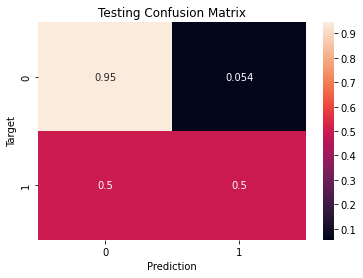

In [ ]:
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Testing Confusion Matrix');

Q) Can you think of a good reason why this model may not be that good even after achieving $85$% accuracy? <br/>
A) The no. of False Negatives are $50$%

##Let us try to tune the hyperparameters using `GridSearch` in hope of better accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = {"C" : np.logspace(-3,3,7), "penalty" : ["l1","l2"]} # l1 lasso l2 ridge
model = GridSearchCV(LogisticRegression(), grid, cv=10)
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [ ]:
print("Tuned hyperparameters are:", model.best_params_)

Tuned hyperparameters are: {'C': 1000.0, 'penalty': 'l2'}


In [ ]:
print("Accuracy on training data is:", accuracy_score(train_targets, model.predict(X_train))*100, "%")

Accuracy on training data is: 85.22096340755999 %


###As we can see, the accuracy increases slightly after tuning the hyperparameters using `GridSearch`